In [1]:
from ProwlsControl import ProwlsControl
pc = ProwlsControl(port='COM5')
pc.laser_toggle_on()

In [6]:
print(pc.multiscan(120.7,121.5,0.05,ftol=0.001,meas_time=0.01))


Stopping Multiscan


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
pc.laser_toggle_off()

UnavailableError: The client connection to the device is closed.

In [8]:
multiscan_data = pc.multiscan_data
with open('multiscan_data_27Jul2025','wb') as file:
    pk.dump(multiscan_data,file)

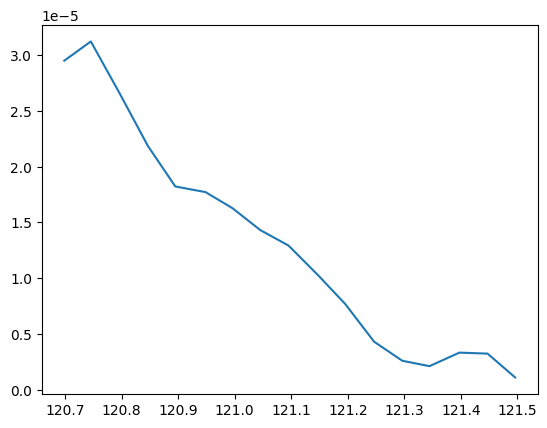

In [3]:

import matplotlib.pyplot as plt
plt.figure()
plt.plot(pc.scan_data['Frequency'],pc.scan_data['Lockin X'])
plt.show()